# 数据操作

In [ ]:
import torch

## 张量表示一种数据类型组成的数据，这个数据可以有多个维度

In [ ]:
x = torch.arange(12)
x

## 可以通过张量的 `shape` 属性来访问张量的形状、通过 `numel` 方法来访问张量中元素的个数

In [ ]:
x.shape

In [ ]:
x.numel()

## 要改变一个张量的形状而不改变元素数量和元素值，可以使用 `reshape` 方法

In [ ]:
X = x.reshape(3, 4)
X

## 使用 `torch.zeros` 方法创建一个元素全为 0 的张量、使用 `torch.ones` 方法创建一个元素全为 1 的张量、使用 `torch.full` 方法创建一个元素全为指定值的张量

In [ ]:
torch.zeros(3, 4)

In [ ]:
torch.ones(2, 3)

In [ ]:
torch.full(size=(2, 3), fill_value=4.)

## 通过提供包含数值的 python 列表（或嵌套列表）来为张量中的每个元素赋予确定值

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

## 常见的标准算术运算符（`+`、`-`、`*`、`/`和`**`）

In [ ]:
x = torch.tensor([1., 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(f"x + y: {x + y}\nx - y: {x - y}\nx  * y: {x * y}\nx / y: {x / y}\nx ** y: {x ** y}")

## 指数运算可以使用 `torch.exp` 方法

In [ ]:
torch.exp(x)

## 使用 `torch.cat` 方法可以把多个张量拼接在一起

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2., 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

In [ ]:
X = torch.arange(24, dtype=torch.float32).reshape(2, 3, 4)
Y = torch.zeros(2, 3, 4)
print(f'X: {X}\nY: {Y}')
print(f'torch.cat((X, Y), dim=0): {torch.cat((X, Y), dim=0)}\ntorch.cat((X, Y), dim=1): {torch.cat((X, Y), dim=1)}\ntorch.cat((X, Y), dim=2): {torch.cat((X, Y), dim=2)}')
print(f'torch.cat((X, Y), dim=0).shape: {torch.cat((X, Y), dim=0).shape}\ntorch.cat((X, Y), dim=1).shape: {torch.cat((X, Y), dim=1).shape}\ntorch.cat((X, Y), dim=2).shape: {torch.cat((X, Y), dim=2).shape}')

## 对张量中所有元素进行求和会产生只有一个元素的张量

In [ ]:
X.sum()

## 即使形状不同，仍然可以通过调用 `广播机制`（broadcasting mechanism） 来执行按元素操作


In [ ]:
# 两个张量的维度数必须相同
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b

In [ ]:
a + b

## 使用 `[-1]` 选择最后一个元素，使用 `[1:3]` 选择第二个和第三个元素

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
X[-1], X[1:3]

## 通过指定索引来将元素写入矩阵

In [ ]:
X[1:2] = 9
X

## 转换 NumPy

In [ ]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

## 标量

In [ ]:
a = torch.tensor(3.5)
a, a.shape, a.item(), float(a), int(a)

# 数据预处理

## 创建一个人工数据集，并存储在 csv（逗号分隔值）文件

In [ ]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

## 从创建的 csv 文件中加载原始数据集

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
data

## 处理缺失的数据，典型的方法包括 `插值` 和 `删除` 两种方法

In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs, outputs

In [ ]:
inputs['NumRooms'].fillna(inputs['NumRooms'].mean(), inplace=True)
inputs

## 对于 `inputs` 中非数值型的数据，可以将 `NaN` 视作一个类别

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

In [ ]:
inputs = inputs.astype(float)
inputs

## 将 `inputs` 和 `outputs` 转换为张量格式

In [ ]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

# 线性代数

## 标量由只有一个元素的张量表示

In [ ]:
import torch

x = torch.tensor(3.)
y = torch.tensor(2.)

x + y, x * y, x / y, x ** y

## 向量可以视为标量组成的列表

In [ ]:
x = torch.arange(4)
x

In [ ]:
# 访问张量的长度
len(x)

In [ ]:
# 由于向量只有一个轴，所以形状只有一个元素
x.shape

## 通过指定两个分量 m 和 n 来创建一个形状为 m × n 的矩阵

In [ ]:
A = torch.arange(20).reshape(5, 4)
A

In [ ]:
# 矩阵的装置
A.T

## 对称矩阵（symmetric matrix）A 等于其转置： $A=A^T$

In [ ]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

In [ ]:
B == B.T

In [ ]:
B == B.t()

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # 通过分配新内存，将 A 的一个副本分配给 B
A is B

## 两个矩阵按元素的乘法称为`哈达玛积`（Hadamard product，数学符号⊙）

In [ ]:
A * B

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

## 按指定维度求和

In [ ]:
A = torch.arange(40).reshape(2, 5, 4)
A.shape, A.sum(), A

In [ ]:
A.sum(axis=0).shape, A.sum(axis=0)

In [ ]:
A.sum(axis=[0, 1])

## 求均值

In [ ]:
A = A.type(dtype=torch.float32)

In [ ]:
A.mean()

In [ ]:
A.sum() / A.numel()

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

## 求和或求均值时保持维度数不变

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

In [ ]:
A / sum_A

## 某个轴计算 `A` 元素的累积总和

In [ ]:
A.cumsum(axis=0)

## 点积是相同位置的按元素乘积的和

In [ ]:
y = torch.ones(4, dtype=torch.float32)
x, y

In [ ]:
torch.dot(x.float(), y), torch.sum(x * y)

## 矩阵向量积 `Ax` 是一个长度为 m 的列向量，其中 $i^{th}$ 元素是点积 $a_{i}^{T}x$

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)

In [ ]:
A.shape, x.shape, torch.mv(A, x.float())

## 矩阵-矩阵乘法 `AB` 看作是简单地执行 `m` 次矩阵-向量积，并将结果拼接在一起，形成一个 n×m 矩阵

In [ ]:
B = torch.ones(4, 3)
A, B

In [ ]:
torch.mm(A, B)

## L2 范数是向量元素平方和的平方根：
$$\parallel x \parallel_{2}=\sqrt{\sum_{i=1}^{n}x_{i}^{2}}$$

In [ ]:
u = torch.tensor([3., -4.])
torch.norm(u)

## L1 范数是向量元素绝对值的之和：
$$\parallel x \parallel_{1}=\sum_{i=1}^{n}{|x_{i}|}$$

In [ ]:
torch.abs(u).sum()

## 矩阵的 `弗罗贝尼乌斯` （Frobenius norm）是矩阵元素的平方和的平方根：
$$\parallel X \parallel_{F}=\sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}x_{ij}^{2}}$$

In [ ]:
torch.norm(torch.ones(4, 9))

# 矩阵计算

# 自动求导

## 假设对函数 $y=2X^{T}X$ 关于列向量`X` 求导

In [ ]:
import torch

In [ ]:
X = torch.arange(4.)
X

In [ ]:
X.requires_grad_(True)

In [ ]:
X.grad # 使用 grad 存储梯度信息，默认是 None

In [ ]:
y = 2 * torch.dot(X, X)
y

In [ ]:
y.backward()

In [ ]:
X.grad

In [ ]:
X.grad == 4 * X

In [ ]:
# pytorch 默认会累积梯度信息
X.grad.zero_()
# 在深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和
y = X.sum()
y.backward()
X.grad

# 线性回归

## 从零开始实现

In [1]:
%matplotlib inline
import random
import torch
import part_1

### 根据带有噪声的线性模型构造一个人造数据集，使用线性模型参数 $w = [2, -3.4]^{T}, b = 4.2$和噪声项 $\delta$ 生成数据集及其标签：
$$y=Xw+b+\delta$$

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = part_1.synthetic_data(true_w, true_b, 1000)

### `features` 中的每一行都包含一个二维数据样本，`labels` 中的每一行都包含一维标签值（一个标量）

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([1.8004, 0.0555]) 
label: tensor([7.5998])


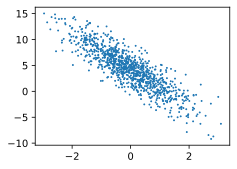

In [4]:
part_1.set_figsize()
part_1.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1)

### 定义一个 `data_iter` 函数， 该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为 `batch_size` 的小批量

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3113, -0.3272],
        [-0.2316, -0.5652],
        [ 1.2743, -0.5238],
        [ 0.2787,  1.4096],
        [-1.3456, -1.0705],
        [ 2.0680, -0.4641],
        [-2.7624,  1.9218],
        [-0.7485,  0.2280],
        [-0.6204,  0.1768],
        [-1.8650,  0.7042]]) 
 tensor([[ 5.9374],
        [ 5.6556],
        [ 8.5289],
        [-0.0247],
        [ 5.1425],
        [ 9.9235],
        [-7.8566],
        [ 1.9331],
        [ 2.3599],
        [-1.9273]])


### 定义初始化模型参数

In [6]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型

见 `part_1.linreg`

### 定义损失函数

见 `part_1.mse`

### 定义优化算法

见 `part_1.sgd`

### 训练过程

In [10]:
lr = 0.03
num_epochs = 3
net = part_1.linreg
loss = part_1.mse

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y, batch_size)
        l.sum().backward()
        part_1.sgd([w, b], lr)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels, batch_size)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000019
epoch 2, loss 0.000010
epoch 3, loss 0.000010


### 比较真实参数和通过训练学到的参数来评估训练的成功程度

In [12]:
print(f'true_w: {true_w}, w: {w}, w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'true_b: {true_b}, b: {b}, b的估计误差: {true_b - b}')

true_w: tensor([ 2.0000, -3.4000]), w: tensor([[ 1.9999],
        [-3.3992]], requires_grad=True), w的估计误差: tensor([ 5.4240e-05, -7.8058e-04], grad_fn=<SubBackward0>)
true_b: 4.2, b: tensor([4.2001], requires_grad=True), b的估计误差: tensor([-6.1512e-05], grad_fn=<RsubBackward1>)


## 简洁实现

In [16]:
import numpy as np
import torch
import torch.nn as nn
import part_1

In [14]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = part_1.synthetic_data(true_w, true_b, 1000)

In [15]:
batch_size = 10
data_iter = part_1.load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.4007,  0.5141],
         [ 0.3115,  0.6716],
         [ 0.4533,  0.8766],
         [-0.4462, -0.9845],
         [-1.2451, -0.7874],
         [ 0.8475,  0.7732],
         [-0.2294, -0.0403],
         [-2.3801, -0.3905],
         [-0.4711,  0.5773],
         [ 0.0550, -0.3945]]),
 tensor([[1.6494],
         [2.5425],
         [2.1268],
         [6.6609],
         [4.3941],
         [3.2728],
         [3.8725],
         [0.7635],
         [1.3005],
         [5.6488]])]

### 使用框架的预定义好的层

In [17]:
net = nn.Sequential(nn.Linear(2, 1))

### 初始化模型参数

In [18]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 计算均方误差使用的是`MSELoss`类，也称为平方 `L2` 范数

In [19]:
loss = nn.MSELoss()

### 实例化 `SGD` 实例

In [20]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 训练过程

In [21]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000181
epoch 2, loss 0.000105
epoch 3, loss 0.000104


### 比较生成数据集的真实参数和通过有限数据训练获得的模型参数

In [23]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-3.6240e-05,  1.1139e-03])
b的估计误差： tensor([0.0003])


# softmax 回归

## 从零开始实现

In [1]:
import torch
import part_1

batch_size = 256
train_iter, test_iter = part_1.load_data_fashion_mnist(batch_size)

### 将展平每个图像，把它们看作长度为`784`的向量。 因为数据集有`10`个类别，所以网络输出维度为 `10`

In [2]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

### 给定一个矩阵`X`，对所有元素求和

In [3]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

### 实现 softmax

$$softmax(X)_{ij}=\frac{exp(X_{ij})}{\sum_{k}(exp(X_{ik}))}$$

见 `part_1.softmax`

### 实现 softmax 回归模型

In [4]:
def net(X):
    return part_1.softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

### 创建一个数据y_hat，其中包含2个样本在3个类别的预测概率， 使用y作为y_hat中概率的索引

In [5]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

### 实现交叉熵损失函数

见 `part_1.cross_entropy`

### softmax 回归训练过程

In [21]:
def train_epoch_ch3(net, train_iter, loss, updater):  
    """训练模型一个迭代周期（定义见第3章）。"""
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = part_1.Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(l) * len(y), part_1.accuracy(y_hat, y),
                y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), part_1.accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [7]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    animator = part_1.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = part_1.evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [8]:
lr = 0.1
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    # 不需要计算梯度
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

def updater(batch_size):
    return sgd([W, b], lr, batch_size)

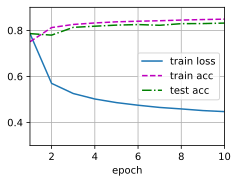

In [9]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, part_1.cross_entropy, num_epochs, updater)

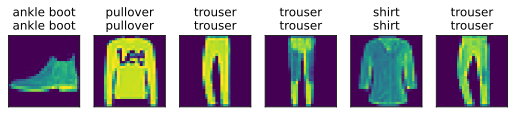

In [10]:
def predict_ch3(net, test_iter, n=6):  
    """预测标签（定义见第3章）。"""
    for X, y in test_iter:
        break
    trues = part_1.get_fashion_mnist_labels(y)
    preds = part_1.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    part_1.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## 简介实现

In [11]:
import torch
from torch import nn
import part_1

In [16]:
batch_size = 256
train_iter, test_iter = part_1.load_data_fashion_mnist(batch_size)

### softmax 回归的输出层是一个全连接层

In [17]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [18]:
loss = nn.CrossEntropyLoss()

In [19]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

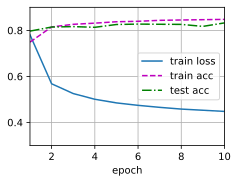

In [22]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 多层感知机

# 模型选择

# 过拟合和欠拟合

# 权重衰退

# 丢弃法

# 模型初始化

# 激活函数